In [1]:
import numpy as np
import pandas as pd

from scipy.stats import binned_statistic_2d
from scipy.interpolate import griddata, interp2d
import pickle
import os


import astropy as ap
from astropy.io import fits
from astropy import table as t
from astropy.table import Table
from astropy import wcs
from astropy.cosmology import WMAP7

import matplotlib.pyplot as plt
import matplotlib.patheffects as patheffects
from matplotlib import rcParams
from matplotlib.path import Path
import matplotlib.patches as patches
import matplotlib as mpl
from matplotlib import rc
from matplotlib import colors
from matplotlib.colors import LogNorm

rcParams["font.family"] = "sans-serif"
rcParams["font.sans-serif"] = ["Computer Modern Sans"]
rcParams["text.usetex"] = True
rcParams["text.latex.preamble"] = r"\usepackage{cmbright}"
rcParams['xtick.major.pad']='10'
rcParams['ytick.major.pad']='10'
rcParams['font.size'] = 22
rcParams['axes.labelsize'] = 22
rcParams['axes.labelweight'] = 'bold'
rcParams['axes.titlesize'] = 17
rcParams['xtick.labelsize'] = 17
rcParams['ytick.labelsize'] = 17
rcParams['legend.fontsize'] = 15
rcParams['figure.titlesize'] = 1

In [2]:
os.chdir('/Users/nitya/Work/Data/Project2')

d1 = pd.read_csv('offset_mlratio_nearest_nonmodel_0.02.csv')
d2 = pd.read_csv('offset_mlratio_nearest_nonmodel_0.06.csv')
d3 = pd.read_csv('offset_mlratio_nearest_nonmodel_0.14.csv')
d1.columns

Index(['Unnamed: 0', 'plate_ifu', 'z', 'hd_z', 'd4_z', 'hd_all', 'd4_all',
       'offset_hd', 'offset_d4', 'mlz_z', 'mlz_all', 'offset_mlz'],
      dtype='object')

In [3]:
t1a = binned_statistic_2d(d1['d4_z'],d1['hd_z'],d1['offset_mlz'],
                         statistic = 'mean',bins=(20,20))
t1b = binned_statistic_2d(d1['d4_z'],d1['hd_z'],d1['offset_mlz'], 
                          statistic = np.std, bins=(20,20))
tcount1 = binned_statistic_2d(d1['d4_z'],d1['hd_z'],d1['z'], 
                             statistic = 'count',bins=(20,20))
yedges1 = t1a[1]
xedges1 = t1a[2]

t2a = binned_statistic_2d(d2['d4_z'],d2['hd_z'],d2['offset_mlz'], 
                         statistic = 'mean',bins=(yedges1,xedges1))
t2b = binned_statistic_2d(d2['d4_z'],d2['hd_z'],d2['offset_mlz'], 
                         statistic = np.std,bins=(yedges1,xedges1))
tcount2 = binned_statistic_2d(d2['d4_z'],d2['hd_z'],d2['offset_mlz'], 
                             statistic = 'count',bins=(yedges1,xedges1))

t3a = binned_statistic_2d(d3['d4_z'],d3['hd_z'],d3['offset_mlz'], 
                         statistic = 'mean',bins=(yedges1,xedges1))
t3b = binned_statistic_2d(d3['d4_z'],d3['hd_z'],d3['offset_mlz'], 
                         statistic = np.std,bins=(yedges1,xedges1))
tcount3 = binned_statistic_2d(d3['d4_z'],d3['hd_z'],d3['offset_mlz'], 
                             statistic = 'count',bins=(yedges1,xedges1))


offset1 = np.ma.array(t1a[0], mask = tcount1[0] <= 3)
offset2 = np.ma.array(t2a[0], mask = tcount2[0] <= 3)
offset3 = np.ma.array(t3a[0], mask = tcount3[0] <= 3)
disp1 = np.ma.array(t1b[0], mask = tcount1[0] <= 3)
disp2 = np.ma.array(t2b[0], mask = tcount2[0] <= 3)
disp3 = np.ma.array(t3b[0], mask = tcount3[0] <= 3)

In [4]:
print(np.min(offset1),np.min(offset2),np.min(offset3))
print(np.max(offset1),np.max(offset2),np.max(offset3))
print(np.min(disp1),np.min(disp2),np.min(disp3))
print(np.max(disp1),np.max(disp2),np.max(disp3))

-0.14698824083365458 -0.46866490579254383 -0.279785702758425
0.378550331878125 0.23558278798818205 0.18124436508766
0.012702427016746622 0.04300085473717657 0.03373276913638832
1.259446844081615 0.9700660434766211 0.6481195864075531


In [5]:
print(np.log10([0.25429258331895965, 0.2190855293342584, 0.0895855759235279]))
np.log10([2.7717393684489102, 2.3269595233120435, 2.68701127054451])

[-0.59466631 -0.65938631 -1.04776191]


array([0.44275239, 0.36678883, 0.42926949])

/Users/nitya/miniconda3/lib/python3.6/site-packages/matplotlib/colors.py:1028: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0
/Users/nitya/miniconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


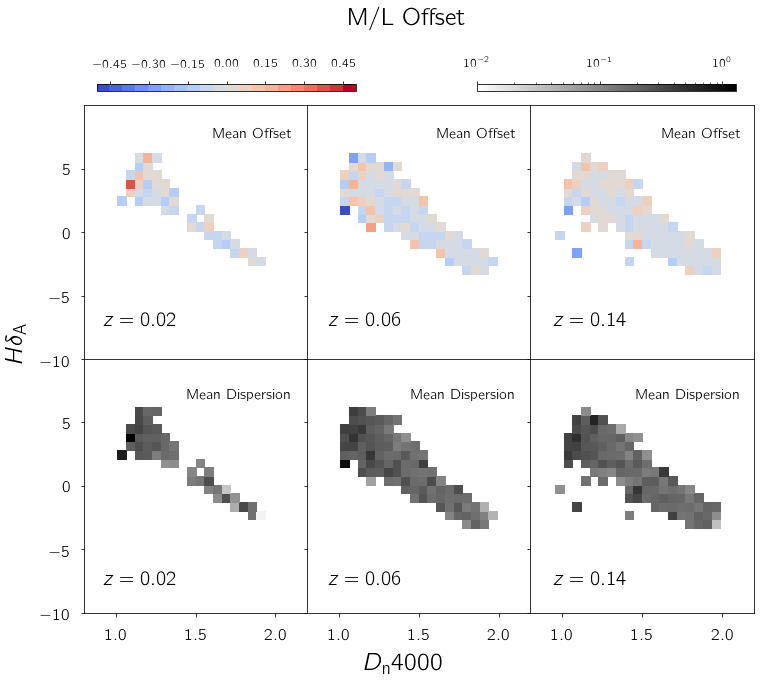

In [6]:
fig, ax = plt.subplots(2, 3, figsize = (12,10))

bounds2 = np.linspace(-0.5, 0.5, 21)
norm2 = colors.BoundaryNorm(boundaries=bounds2, ncolors=256)
#bounds1 = np.linspace(0.005, 1.0, 21)
norm1 = colors.LogNorm(0.01,1.3)
#norm1 = colors.BoundaryNorm(np.linspace(0.01,1.3,21), ncolors=256)


cs1a = ax[0,0].pcolormesh(yedges1,xedges1,(np.transpose(offset1)),
                         cmap = plt.cm.coolwarm, norm = norm2)
cs2a = ax[0,1].pcolormesh(yedges1,xedges1,(np.transpose(offset2)), 
                         cmap = plt.cm.coolwarm, norm = norm2)
cs3a = ax[0,2].pcolormesh(yedges1,xedges1,(np.transpose(offset3)), 
                         cmap = plt.cm.coolwarm, norm =norm2)

cs1b = ax[1,0].pcolormesh(yedges1,xedges1,np.transpose(disp1), 
                          cmap = plt.cm.binary, norm = norm1)
cs2b = ax[1,1].pcolormesh(yedges1,xedges1,np.transpose(disp2), 
                          cmap = plt.cm.binary, norm = norm1)
cs3b = ax[1,2].pcolormesh(yedges1,xedges1,np.transpose(disp3), 
                          cmap = plt.cm.binary, norm = norm1)
ax[0,0].set_xlim(0.8,2.2)
ax[0,0].set_ylim(-10,10)
ax[0,0].set_xticks([1.0,1.5,2.0])
ax[0,0].xaxis.set_ticklabels([])
ax[0,0].yaxis.set_ticks([-10,-5,0,5])
ax[1,0].set_xlim(0.8,2.2)
ax[1,0].set_ylim(-10,10)
ax[1,0].set_xticks([1.0,1.5,2.0])
ax[1,0].yaxis.set_ticks([-10,-5,0,5])
ax[0,1].set_xlim(0.8,2.2)
ax[0,1].set_ylim(-10,10)
ax[0,1].set_xticks([1.0,1.5,2.0])
ax[0,1].set_yticks([-10,-5,0,5])
ax[0,1].xaxis.set_ticklabels([])
ax[0,1].yaxis.set_ticklabels([])
ax[1,1].set_xlim(0.8,2.2)
ax[1,1].set_ylim(-10,10)
ax[1,1].set_xticks([1.0,1.5,2.0])
ax[1,1].yaxis.set_ticklabels([])
ax[0,2].set_xlim(0.8,2.2)
ax[0,2].set_ylim(-10,10)
ax[0,2].set_yticks([-10,-5,0,5])
ax[0,2].set_xticks([1.0,1.5,2.0])
ax[0,2].yaxis.set_ticklabels([])
ax[1,2].set_xlim(0.8,2.2)
ax[1,2].set_ylim(-10,10)
ax[1,2].yaxis.set_ticklabels([])


cbar_ax1 = fig.add_axes([0.14, 0.85, 0.3, 0.01])
cb1 = fig.colorbar(cs1a,orientation = 'horizontal', cax=cbar_ax1)
cb1.ax.xaxis.set_ticks_position('top')
cb1.ax.tick_params(labelsize=13)
#cb1.set_clim(-0.16,0.16)
#cb1.set_ticks([-0.15,-0.1,-0.05,0,0.05,0.1,0.15])

cbar_ax2 = fig.add_axes([0.58, 0.85, 0.3, 0.01])
cb2 = fig.colorbar(cs1b,orientation = 'horizontal', cax=cbar_ax2)
cb2.ax.xaxis.set_ticks_position('top')
cb2.ax.tick_params(labelsize=13)

fig.text(0.32, 0.79, 'Mean Offset',
         ha='center', va='center', fontsize = 15)
fig.text(0.58, 0.79, 'Mean Offset',
         ha='center', va='center', fontsize = 15)
fig.text(0.84, 0.79, r'Mean Offset',
         ha='center', va='center', fontsize = 15)

fig.text(0.305, 0.43, 'Mean Dispersion',
         ha='center', va='center', fontsize = 15)
fig.text(0.565, 0.43, 'Mean Dispersion',
         ha='center', va='center', fontsize = 15)
fig.text(0.825, 0.43, r'Mean Dispersion',
         ha='center', va='center', fontsize = 15)

fig.text(0.19, 0.53, r'$z = 0.02$',
         ha='center', va='center', fontsize = 20)
fig.text(0.45, 0.53, r'$z = 0.06$',
         ha='center', va='center', fontsize = 20)
fig.text(0.71, 0.53, r'$z = 0.14$',
         ha='center', va='center', fontsize = 20)

fig.text(0.19, 0.17, r'$z = 0.02$',
         ha='center', va='center', fontsize = 20)
fig.text(0.45, 0.17, r'$z = 0.06$',
         ha='center', va='center', fontsize = 20)
fig.text(0.71, 0.17, r'$z = 0.14$',
         ha='center', va='center', fontsize = 20)

fig.text(0.495, 0.05, r'$D_{\rm n}4000$', 
         ha='center', va='center', fontsize = 25)
fig.text(0.05, 0.5, r'$H\delta_{\rm A}$', 
          rotation=90, ha='center', va='center', fontsize = 25)

fig.text(0.5, 0.95, 'M/L Offset',
         ha='center', va='center', fontsize = 25)

filename = "/Users/nitya/Desktop/ml_offset_plot.pdf"
plt.gcf().subplots_adjust(wspace=0, hspace = 0, top = 0.83)
plt.savefig(filename)
plt.show()

In [7]:
t1a = binned_statistic_2d(d1['d4_z'],d1['hd_z'],d1['offset_d4'],
                         statistic = 'mean',bins=(20,20))
t1b = binned_statistic_2d(d1['d4_z'],d1['hd_z'],d1['offset_d4'], 
                          statistic = np.std, bins=(20,20))
tcount1 = binned_statistic_2d(d1['d4_z'],d1['hd_z'],d1['z'], 
                             statistic = 'count',bins=(20,20))
yedges1 = t1a[1]
xedges1 = t1a[2]

t2a = binned_statistic_2d(d2['d4_z'],d2['hd_z'],d2['offset_d4'], 
                         statistic = 'mean',bins=(yedges1,xedges1))
t2b = binned_statistic_2d(d2['d4_z'],d2['hd_z'],d2['offset_d4'], 
                         statistic = np.std,bins=(yedges1,xedges1))
tcount2 = binned_statistic_2d(d2['d4_z'],d2['hd_z'],d2['offset_d4'], 
                             statistic = 'count',bins=(yedges1,xedges1))

t3a = binned_statistic_2d(d3['d4_z'],d3['hd_z'],d3['offset_d4'], 
                         statistic = 'mean',bins=(yedges1,xedges1))
t3b = binned_statistic_2d(d3['d4_z'],d3['hd_z'],d3['offset_d4'], 
                         statistic = np.std,bins=(yedges1,xedges1))
tcount3 = binned_statistic_2d(d3['d4_z'],d3['hd_z'],d3['offset_d4'], 
                             statistic = 'count',bins=(yedges1,xedges1))


offset1 = np.ma.array(t1a[0], mask = tcount1[0] <= 3)
offset2 = np.ma.array(t2a[0], mask = tcount2[0] <= 3)
offset3 = np.ma.array(t3a[0], mask = tcount3[0] <= 3)
disp1 = np.ma.array(t1b[0], mask = tcount1[0] <= 3)
disp2 = np.ma.array(t2b[0], mask = tcount2[0] <= 3)
disp3 = np.ma.array(t3b[0], mask = tcount3[0] <= 3)

In [8]:
print(np.min(offset1),np.min(offset2),np.min(offset3))
print(np.max(offset1),np.max(offset2),np.max(offset3))
print(np.min(disp1),np.min(disp2),np.min(disp3))
print(np.max(disp1),np.max(disp2),np.max(disp3))

-0.12920174812010884 -0.16845786925625497 -0.10716271716507182
0.08521198971347736 0.036362271512624424 0.10053993385536737
0.025131534435155548 0.006199634835864043 0.00740722699934003
0.15076619426942578 0.33646608281820434 0.19526149105913085


/Users/nitya/miniconda3/lib/python3.6/site-packages/matplotlib/colors.py:1028: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


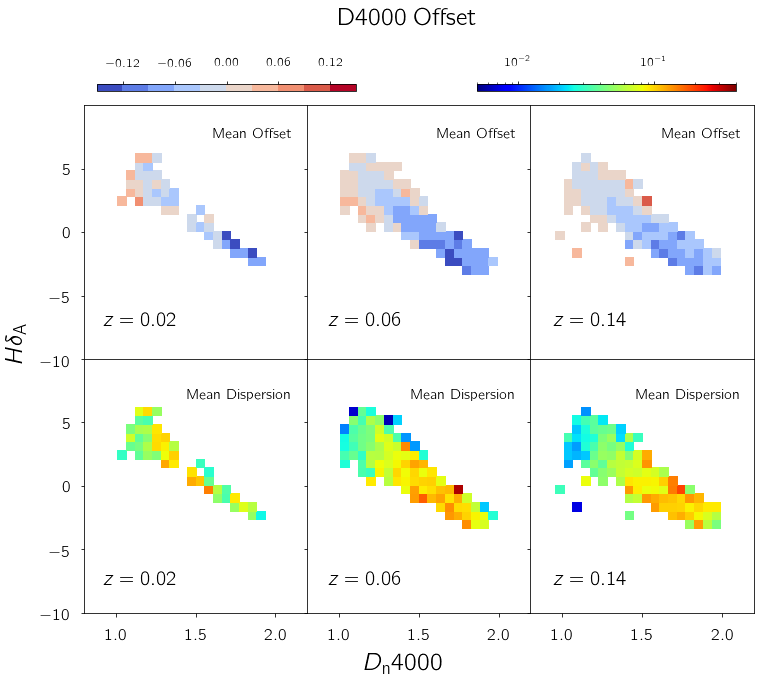

In [9]:
fig, ax = plt.subplots(2, 3, figsize = (12,10))

bounds2 = np.linspace(-0.15, 0.15, 11)
norm2 = colors.BoundaryNorm(boundaries=bounds2, ncolors=256)
#bounds1 = np.linspace(0.005, 1.0, 21)
norm1 = colors.LogNorm(0.005,0.4)
#norm1 = colors.BoundaryNorm(np.linspace(0.01,1.3,21), ncolors=256)


cs1a = ax[0,0].pcolormesh(yedges1,xedges1,(np.transpose(offset1)),
                         cmap = plt.cm.coolwarm, norm = norm2)
cs2a = ax[0,1].pcolormesh(yedges1,xedges1,(np.transpose(offset2)), 
                         cmap = plt.cm.coolwarm, norm = norm2)
cs3a = ax[0,2].pcolormesh(yedges1,xedges1,(np.transpose(offset3)), 
                         cmap = plt.cm.coolwarm, norm =norm2)

cs1b = ax[1,0].pcolormesh(yedges1,xedges1,np.transpose(disp1), 
                          cmap = plt.cm.jet, norm = norm1)
cs2b = ax[1,1].pcolormesh(yedges1,xedges1,np.transpose(disp2), 
                          cmap = plt.cm.jet, norm = norm1)
cs3b = ax[1,2].pcolormesh(yedges1,xedges1,np.transpose(disp3), 
                          cmap = plt.cm.jet, norm = norm1)
ax[0,0].set_xlim(0.8,2.2)
ax[0,0].set_ylim(-10,10)
ax[0,0].set_xticks([1.0,1.5,2.0])
ax[0,0].xaxis.set_ticklabels([])
ax[0,0].yaxis.set_ticks([-10,-5,0,5])
ax[1,0].set_xlim(0.8,2.2)
ax[1,0].set_ylim(-10,10)
ax[1,0].set_xticks([1.0,1.5,2.0])
ax[1,0].yaxis.set_ticks([-10,-5,0,5])
ax[0,1].set_xlim(0.8,2.2)
ax[0,1].set_ylim(-10,10)
ax[0,1].set_xticks([1.0,1.5,2.0])
ax[0,1].set_yticks([-10,-5,0,5])
ax[0,1].xaxis.set_ticklabels([])
ax[0,1].yaxis.set_ticklabels([])
ax[1,1].set_xlim(0.8,2.2)
ax[1,1].set_ylim(-10,10)
ax[1,1].set_xticks([1.0,1.5,2.0])
ax[1,1].yaxis.set_ticklabels([])
ax[0,2].set_xlim(0.8,2.2)
ax[0,2].set_ylim(-10,10)
ax[0,2].set_yticks([-10,-5,0,5])
ax[0,2].set_xticks([1.0,1.5,2.0])
ax[0,2].yaxis.set_ticklabels([])
ax[1,2].set_xlim(0.8,2.2)
ax[1,2].set_ylim(-10,10)
ax[1,2].yaxis.set_ticklabels([])


cbar_ax1 = fig.add_axes([0.14, 0.85, 0.3, 0.01])
cb1 = fig.colorbar(cs1a,orientation = 'horizontal', cax=cbar_ax1)
cb1.ax.xaxis.set_ticks_position('top')
cb1.ax.tick_params(labelsize=13)
#cb1.set_clim(-0.16,0.16)
#cb1.set_ticks([-0.15,-0.1,-0.05,0,0.05,0.1,0.15])

cbar_ax2 = fig.add_axes([0.58, 0.85, 0.3, 0.01])
cb2 = fig.colorbar(cs1b,orientation = 'horizontal', cax=cbar_ax2)
cb2.ax.xaxis.set_ticks_position('top')
cb2.ax.tick_params(labelsize=13)

fig.text(0.32, 0.79, 'Mean Offset',
         ha='center', va='center', fontsize = 15)
fig.text(0.58, 0.79, 'Mean Offset',
         ha='center', va='center', fontsize = 15)
fig.text(0.84, 0.79, r'Mean Offset',
         ha='center', va='center', fontsize = 15)

fig.text(0.305, 0.43, 'Mean Dispersion',
         ha='center', va='center', fontsize = 15)
fig.text(0.565, 0.43, 'Mean Dispersion',
         ha='center', va='center', fontsize = 15)
fig.text(0.825, 0.43, r'Mean Dispersion',
         ha='center', va='center', fontsize = 15)

fig.text(0.19, 0.53, r'$z = 0.02$',
         ha='center', va='center', fontsize = 20)
fig.text(0.45, 0.53, r'$z = 0.06$',
         ha='center', va='center', fontsize = 20)
fig.text(0.71, 0.53, r'$z = 0.14$',
         ha='center', va='center', fontsize = 20)

fig.text(0.19, 0.17, r'$z = 0.02$',
         ha='center', va='center', fontsize = 20)
fig.text(0.45, 0.17, r'$z = 0.06$',
         ha='center', va='center', fontsize = 20)
fig.text(0.71, 0.17, r'$z = 0.14$',
         ha='center', va='center', fontsize = 20)

fig.text(0.495, 0.05, r'$D_{\rm n}4000$', 
         ha='center', va='center', fontsize = 25)
fig.text(0.05, 0.5, r'$H\delta_{\rm A}$', 
          rotation=90, ha='center', va='center', fontsize = 25)

fig.text(0.5, 0.95, 'D4000 Offset',
         ha='center', va='center', fontsize = 25)

filename = "/Users/nitya/Desktop/d4_offset_plot.pdf"
plt.gcf().subplots_adjust(wspace=0, hspace = 0, top = 0.83)
plt.savefig(filename)
plt.show()